## Problem 1: Geocode shopping centers (5 points)

The overall aim of problems 1-3 is to find out **how many people live within a walking distance (1.5 km) from certain shopping centres in Helsinki**.

Problem 1 concerns the locations of shopping centres: find their addresses and translate them into coordinates.

---

### a) Prepare an input file containing the addresses of shopping centres

Find out the addresses of the following shopping centres (e.g., by using your favourite search engine), and collect them in a text file called `shopping_centres.txt`:

 - Itis
 - Forum
 - Iso-omena
 - Sello
 - Jumbo
 - REDI
 - Tripla 
 
The text file should be in semicolon-separated format (`;`) and include the following columns:

- `id` (integer) a unique identifier for each shopping centre (a
- `name` (string) of each shopping center
- `addr` (string) the address 


See an example of how to format the text file [in the lesson 3 materials](https://autogis-site.readthedocs.io/en/latest/lessons/lesson-3/geocoding-in-geopandas.html). Remember to *add*, *commit*, and *push* the file to your git repository.

---


### b) Read the list of addresses

Read the list of addresses you just prepared into a `pandas.DataFrame` called `shopping_centres`

In [123]:
# ADD YOUR OWN CODE HERE
import pathlib
import pandas
NOTEBOOK_PATH = pathlib.Path().resolve()
DATA_DIRECTORY = NOTEBOOK_PATH/ "Data"

In [124]:
shopping_centres = pandas.read_csv(DATA_DIRECTORY/"shopping_centres.txt", sep = ";")
shopping_centres


,id,name,addr
0,1,Itis shopping centre,"Itäkatu 1-7, 00930 Helsinki, Finland"
1,2,Forum shopping centre,"Mannerheimintie 14–20, 00100 Helsinki, Finland"
2,3,ISo-Omena shopping centre,"Piispansilta 11,02230 Espoo, Finland"
3,4,Sello shopping centre,"Leppävaarankatu 3-9, 02600 Espoo, Finland"
4,5,Jumbo shopping centre,"Vantaanportinkatu 3, 01510 Vantaa, Finland"
5,6,REDI shopping centre,"Hermannin rantatie 5, 00580 Helsinki, Finland"
6,7,Tripla shopping centre,"Fredikanterassi 1, 00520 Helsinki, Finland"


In [125]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION
import pandas
assert isinstance(shopping_centres, pandas.DataFrame)
for column in ("id", "name", "addr"):
    assert column in shopping_centres.columns


---

### c) Geocode the addresses

Geocode the addresses using the Nominatim geocoding service. Join the results with the input data, and store them in a `geopandas.GeoDataFrame` with the same name (`shopping_centres`). 

Remember to define a custom `user_agent` string!

In [127]:
# ADD YOUR OWN CODE HERE
import geopandas
shopping_centres_1= geopandas.tools.geocode(
    shopping_centres["addr"],
    provider="nominatim",
    user_agent="Dulanic",
    timeout=10
)

In [128]:
shopping_centres_1

,geometry,address
0,POINT (25.08294 60.21170),"Kauppakeskus Itis, 1-7, Itäkatu, Itäkeskus, Va..."
1,POINT (24.93828 60.16878),"Salaattiasema, 14-20, Mannerheimintie, Keskust..."
2,POINT (24.73834 60.16129),"Iso Omena, 11, Piispansilta, Matinkylä, Suur-M..."
3,POINT (24.81042 60.21752),"Lasten kappeli Arkki, 3-9, Leppävaarankatu, Sä..."
4,POINT (24.96282 60.29245),"Stockmann, 3, Vantaanportinkatu, Vantaanportti..."
5,POINT (24.97904 60.18702),"Silta, 5, Hermannin rantatie, Verkkosaari, Kal..."
6,POINT (24.93026 60.19846),"Mall of Tripla, 1, Fredikanterassi, Keski-Pasi..."


In [129]:
shopping_centres = shopping_centres_1.join(shopping_centres)

In [130]:
shopping_centres

,geometry,address,id,name,addr
0,POINT (25.08294 60.21170),"Kauppakeskus Itis, 1-7, Itäkatu, Itäkeskus, Va...",1,Itis shopping centre,"Itäkatu 1-7, 00930 Helsinki, Finland"
1,POINT (24.93828 60.16878),"Salaattiasema, 14-20, Mannerheimintie, Keskust...",2,Forum shopping centre,"Mannerheimintie 14–20, 00100 Helsinki, Finland"
2,POINT (24.73834 60.16129),"Iso Omena, 11, Piispansilta, Matinkylä, Suur-M...",3,ISo-Omena shopping centre,"Piispansilta 11,02230 Espoo, Finland"
3,POINT (24.81042 60.21752),"Lasten kappeli Arkki, 3-9, Leppävaarankatu, Sä...",4,Sello shopping centre,"Leppävaarankatu 3-9, 02600 Espoo, Finland"
4,POINT (24.96282 60.29245),"Stockmann, 3, Vantaanportinkatu, Vantaanportti...",5,Jumbo shopping centre,"Vantaanportinkatu 3, 01510 Vantaa, Finland"
5,POINT (24.97904 60.18702),"Silta, 5, Hermannin rantatie, Verkkosaari, Kal...",6,REDI shopping centre,"Hermannin rantatie 5, 00580 Helsinki, Finland"
6,POINT (24.93026 60.19846),"Mall of Tripla, 1, Fredikanterassi, Keski-Pasi...",7,Tripla shopping centre,"Fredikanterassi 1, 00520 Helsinki, Finland"


<AxesSubplot: >

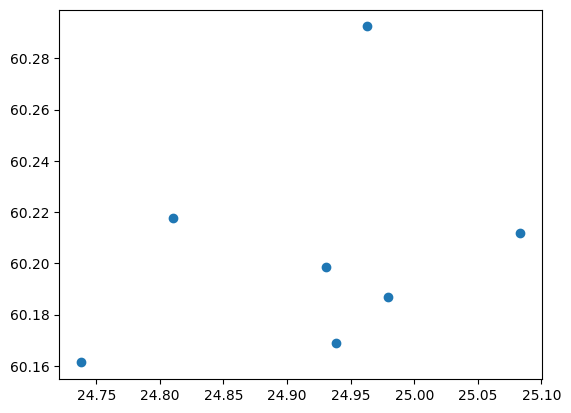

In [132]:
shopping_centres.plot()

In [133]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION
import geopandas
assert isinstance(shopping_centres, geopandas.GeoDataFrame)
for column in ("id", "name", "addr", "geometry"):
    assert column in shopping_centres.columns

Check that the coordinate reference system of the geocoded result is correctly defined, and **reproject the layer into ETRS GK-25** (EPSG:3879):

In [134]:
# ADD YOUR OWN CODE HERE
shopping_centres.crs
# the coordinate reference for the geodataframe was defined by the geocoding nominatim 

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [135]:
# reprojecting/ crs transformation 
import pyproj
shopping_centres = shopping_centres.to_crs("EPSG:3879")

In [136]:
shopping_centres.crs

<Derived Projected CRS: EPSG:3879>
Name: ETRS89 / GK25FIN
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Finland - nominally onshore between 24°30'E and 25°30'E but may be used in adjacent areas if a municipality chooses to use one zone over its whole extent.
- bounds: (24.5, 59.94, 25.5, 68.9)
Coordinate Operation:
- name: Finland Gauss-Kruger zone 25
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [137]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION
import pyproj
assert shopping_centres.crs == pyproj.CRS("EPSG:3879")


---

### d) Save the resulting vector data set

Save `shopping_centres` as a *GeoPackage* named `shopping_centres.gpkg`:

In [138]:
# ADD YOUR OWN CODE HERE
shopping_centres.to_file(DATA_DIRECTORY / "shopping_centres.gpkg")


---

Well done! Now you can continue to [problem 2](Exercise-3-Problem-2.ipynb)